In [159]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [160]:
# Gets the Azimuth data
data_az = '/Users/ascovera/Desktop/lsa-ast361/Work/ascovera/7lab/radio-astronomy/sun_azimuth/'
az_files = glob.glob(data_az + "sun*")
az_files.sort()

#Gets the Elevation Data
data_el = '/Users/ascovera/Desktop/lsa-ast361/Work/ascovera/7lab/radio-astronomy/sun_elevation/'
el_files = glob.glob(data_el + "sun*")
el_files.sort()

In [161]:
# Gets the Spectra of Azimuth
az_spec = []
for az_file in az_files:
    with open(az_file) as az_data:
        spec_rows_az = []
        for j, row in enumerate(az_data, start=1):
            if j%4 == 0:
                spec_rows_az.append(row)
        tot_spec_az = np.zeros(1024)
        for row in spec_rows_az:
            t_spec_az = row.split(' ')
            spec_az = []
            for val in t_spec_az:
                if val != '' and val != '\n':
                    spec_az.append(val)
            tot_spec_az = tot_spec_az + np.float64(spec_az)
        az_spec.append(tot_spec_az)

# gets the spectra of elevation
el_spec = []
for el_file in el_files:
    with open(el_file) as el_data:
        spec_rows_el = []
        for j, row in enumerate(el_data, start=1):
            if j%4 == 0:
                spec_rows_el.append(row)
        tot_spec_el = np.zeros(1024)
        for row in spec_rows_el:
            t_spec_el = row.split(' ')
            spec_el = []
            for val in t_spec_el:
                if val != '' and val != '\n':
                    spec_el.append(val)
            tot_spec_el = tot_spec_el + np.float64(spec_el)
        el_spec.append(tot_spec_el)

In [162]:
# sets up the frequency axis
freq = []
az_flux = []
sf = 1416 # start frequency
bw = 0.009766 # bandwidth
nc = 1024 # number of channels

for i in range(0,nc):
    freq.append(sf+(i*bw))

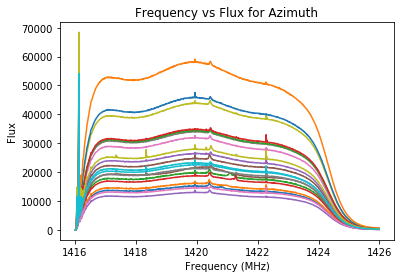

In [163]:
# Plots the flux and frequency for azimuth
for i in range(0, len(az_spec)):
    plt.plot(freq, az_spec[i])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Frequency vs Flux for Azimuth")
plt.show()

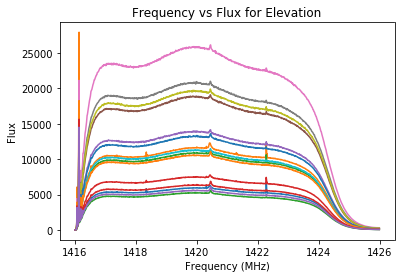

In [164]:
# Plots the flux and frequency for elevation
for i in range(0, len(el_spec)):
    plt.plot(freq, el_spec[i])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Frequency vs Flux for Elevation")
plt.show()

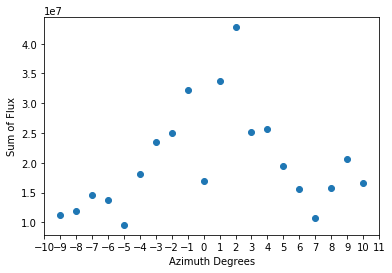

In [165]:
# Determines and plots the sum of lfuxes versus the azimuth angle
az_sum = []
for i in range(0,len(az_spec)):
    az_sum_flux = 0
    for j in range(15,1024):
        az_sum_flux = az_sum_flux + az_spec[i][j]
    az_sum.append(az_sum_flux)
az_xvals = np.arange(-9,11)
plt.scatter(az_xvals, az_sum)
plt.xticks(np.arange(-10, 12, 1.0))
plt.xlabel("Azimuth Degrees")
plt.ylabel("Sum of Flux")
plt.show()

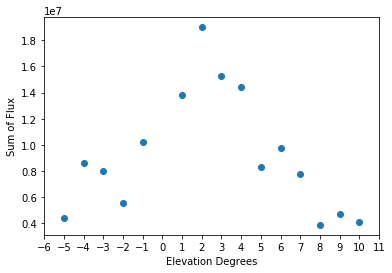

In [166]:
# Determines and plots the sum of lfuxes versus the elevation angle
el_sum = []
for i in range(0,len(el_spec)):
    el_sum_flux = 0
    for j in range(15,1024):
        el_sum_flux = el_sum_flux + el_spec[i][j]
    el_sum.append(el_sum_flux)
el_xvals = [-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10]
plt.scatter(el_xvals, el_sum)
plt.xticks(np.arange(-6, 12, 1.0))
plt.xlabel("Elevation Degrees")
plt.ylabel("Sum of Flux")
plt.show()

In [167]:
# gaussian function
def gaus(x, stdev, mean, A):
    exponent = (-0.5) * (((x - mean)/stdev)**2)
    base = 1 / (stdev * ((2 * np.pi)**0.5))
    return A * base * (np.e ** (exponent))

Standard Deviation=6.393422523252205, Mean=1.2461641528708591, Amplitude=454971211.5929674


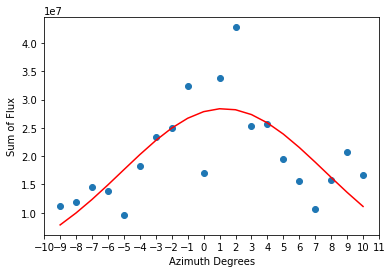

In [173]:
# Plots the gaussian function over teh azimuth data using curvefit
stdev_0_az,mean_0_az,A_0_az = (3, 0, 4*10**7)
stdev_t_az,mean_t_az,A_t_az = (3, 0, 4*10**7)
coeffs, fiterr = curve_fit(gaus, az_xvals, az_sum, p0=(stdev_t_az,mean_t_az,A_t_az))

print ("Standard Deviation=%s, Mean=%s, Amplitude=%s" % (coeffs[0], coeffs[1], coeffs[2]))
az_stdev = coeffs[0]

plt.scatter(az_xvals, az_sum)
plt.plot(az_xvals,gaus(az_xvals,*coeffs),'r')
plt.xticks(np.arange(-10, 12, 1.0))
plt.xlabel("Azimuth Degrees")
plt.ylabel("Sum of Flux")
plt.show()

Standard Deviation=4.181145835391774, Mean=2.02285652116524, Amplitude=158409446.23452002


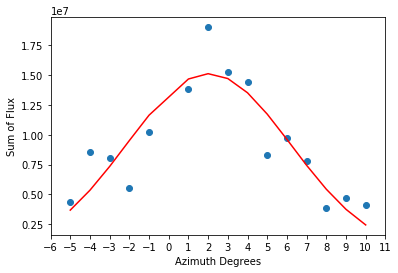

In [172]:
# Plots the gaussian function over teh elevation data using curvefit
stdev_0_el,mean_0_el,A_0_el = (3, 0, 4*10**7)
stdev_t_el,mean_t_el,A_t_el = (3, 0, 4*10**7)
coeffs, fiterr = curve_fit(gaus, el_xvals, el_sum, p0=(stdev_t_az,mean_t_az,A_t_az))

print ("Standard Deviation=%s, Mean=%s, Amplitude=%s" % (coeffs[0], coeffs[1], coeffs[2]))
el_stdev = coeffs[0]

plt.scatter(el_xvals, el_sum)
plt.plot(el_xvals,gaus(el_xvals,*coeffs),'r')
plt.xticks(np.arange(-6, 12, 1.0))
plt.xlabel("Azimuth Degrees")
plt.ylabel("Sum of Flux")
plt.show()

In [178]:
# Determines the FWHM for each
# FWHM = 2 * sqrt(2 * ln(2)) * stdev
# 2 * sqrt(2 * ln(2)) = mod
mod = 2.35482 # calculated with calculator
A_FWHM = mod * az_stdev
E_FWHM = mod * el_stdev
print("Azimuth Full-Width Half-Max: ", A_FWHM)
print("Elevation Full-Width Half-Max: ", E_FWHM)

Azimuth Full-Width Half-Max:  15.055359226204759
Elevation Full-Width Half-Max:  9.845845836097258
